In [1]:
import numpy as np
from sklearn import decomposition, svm
from matplotlib import pyplot as plt

from main import get_embeddings


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/lightning/pytorch/utilities/migration/utils.py:55: The loaded checkpoint was produced with Lightning v2.2.4, which is newer than your current Lightning version: v2.1.0
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
embeddings = []

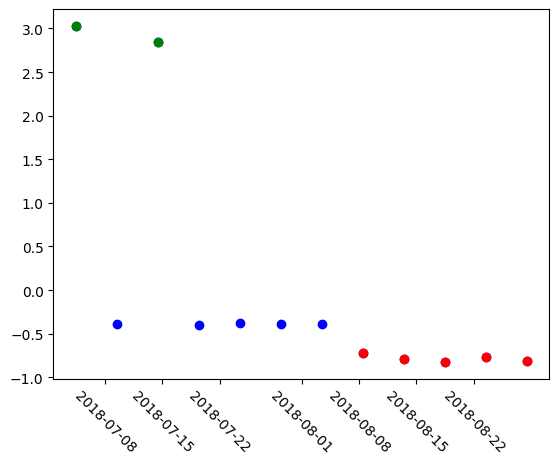

In [3]:
# Run PCA
pca = decomposition.PCA(n_components=1)
pca_result = pca.fit_transform(embeddings)

plt.xticks(rotation=-45)

# Plot all points in blue first
plt.scatter(stack.time, pca_result, color="blue")

# Re-plot cloudy images in green
plt.scatter(stack.time[0], pca_result[0], color="green")
plt.scatter(stack.time[2], pca_result[2], color="green")

# Color all images after fire in red
plt.scatter(stack.time[-5:], pca_result[-5:], color="red")

In [4]:
# Label the images we downloaded
# 0 = Cloud
# 1 = Forest
# 2 = Fire
labels = np.array([0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2])

# Split into fit and test manually, ensuring we have all 3 classes in both sets
fit = [0, 1, 3, 4, 7, 8, 9]
test = [2, 5, 6, 10, 11]

# Train a support vector machine model
clf = svm.SVC()
clf.fit(embeddings[fit] + 100, labels[fit])

# Predict classes on test set
prediction = clf.predict(embeddings[test] + 100)

# Perfect match for SVM
match = np.sum(labels[test] == prediction)
print(f"Matched {match} out of {len(test)} correctly")

Matched 5 out of 5 correctly


In [1]:
import requests
import numpy as np
import pickle
import base64

server_url = "http://127.0.0.1:8094/predict"
# server_url = "https://8094-01j03cpsnxgzf6zqczh86561ch.cloudspaces.litng.ai/predict"

response = requests.post(
    server_url,
    json={
        "lat": 37.30939,
        "lon":  -8.57207,
        "startdate": "2018-07-01",
        "enddate": "2018-09-01",
        # "size": 256,
        "whoami": "eugene",
    },
)
if response.status_code == 200:
    base64_encoded_array = response.json()["output"]
    pickled_array = base64.b64decode(base64_encoded_array)
    embeddings = pickle.loads(pickled_array)
    print(embeddings.shape)
elif response.status_code == 401:
    raise ValueError(response.content)
else:
    print(
        "Failed to get response from the server, status code:", response.status_code
    )


(1, 768)
